# 1. Install Dependencies and Setup

In [6]:
!pip uninstall -y tensorflow tensorflow-gpu

In [7]:
pip install tensorflow

  Using cached tensorflow-2.16.2-cp312-cp312-macosx_10_15_x86_64.whl.metadata (4.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.7/259.7 MB 9.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 9.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 8.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 8.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 9.9 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 5.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.0/601.0 kB 7.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
!pip install opencv-python matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.5 MB/s eta 0:00:0000:0100:01


In [20]:
import tensorflow as tf
import os

In [21]:
print("TensorFlow version:", tf.__version__)
print("GPU available:", tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.16.2
GPU available: []


In [22]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [23]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [24]:
from PIL import Image
import os

input_dir = 'data'
output_dir = 'converted_data'

for subdir, dirs, files in os.walk(input_dir):
    for file in files:
        if file.endswith('.tif'):
            input_path = os.path.join(subdir, file)
            output_subdir = os.path.join(output_dir, os.path.relpath(subdir, input_dir))
            os.makedirs(output_subdir, exist_ok=True)
            output_path = os.path.join(output_subdir, file.replace('.tif', '.jpg'))
            
            # Convert and save as .jpg
            with Image.open(input_path) as img:
                img.convert('RGB').save(output_path, 'JPEG')

In [25]:
import cv2
import imghdr

/var/folders/2f/jtsjq2nn3j70hjf5f55tt20c0000gn/T/ipykernel_1813/4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [26]:
data_dir = 'converted_data'

In [27]:
image_exts = ['jpg']

In [28]:
for image_class in os.listdir(data_dir):
    image_class_path = os.path.join(data_dir, image_class)
    if not os.path.isdir(image_class_path):
        continue  # Skip non-directory entries

    for image in os.listdir(image_class_path):
        image_path = os.path.join(image_class_path, image)
        try:
            # Read the image using OpenCV
            img = cv2.imread(image_path)
            # Check file type using imghdr
            tip = imghdr.what(image_path)
            ext = os.path.splitext(image)[-1].lower().lstrip('.')  # Extract and lowercase the file extension

            # Check if the file is valid
            if tip not in image_exts and ext not in image_exts:
                print(f'File not in ext list or unrecognized: {image_path}')
                os.remove(image_path)  # Remove invalid files
        except Exception as e:
            print(f'Issue with image: {image_path} -> {e}')

# 3. Load Data

In [29]:
import numpy as np
from matplotlib import pyplot as plt

In [30]:
data = tf.keras.utils.image_dataset_from_directory('converted_data')

Found 20000 files belonging to 2 classes.


In [31]:
data_iterator = data.as_numpy_iterator()

In [32]:
batch = data_iterator.next()

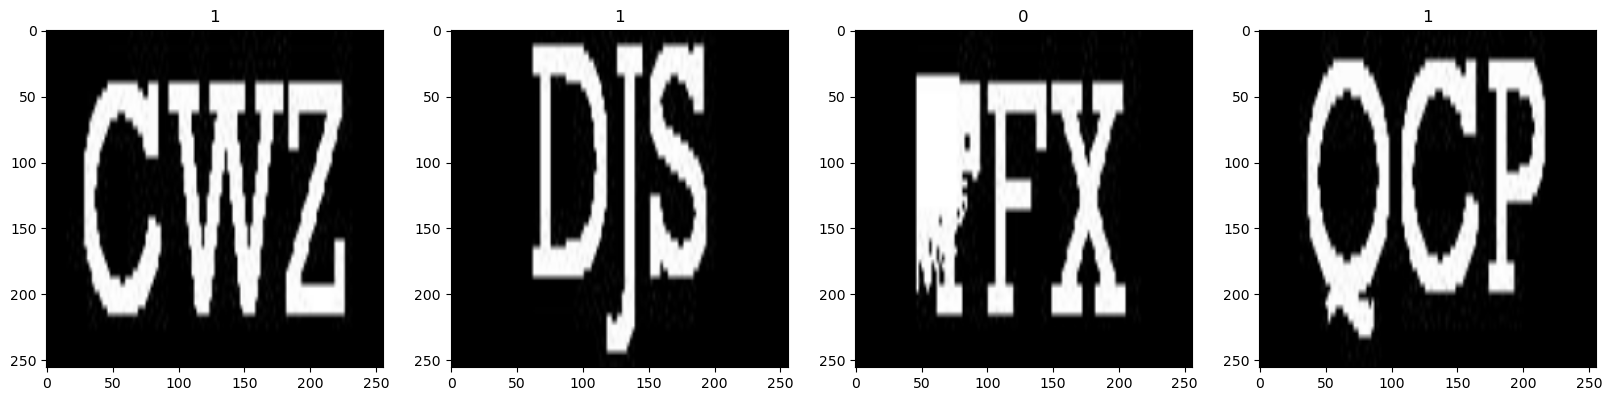

In [33]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [34]:
data = data.map(lambda x,y: (x/255, y))

In [35]:
data.as_numpy_iterator().next()

(array([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         ...,
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],
 
 
        [

# 5. Split Data

In [36]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [37]:
train_size

437

In [38]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [40]:
model = Sequential()

In [41]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/opt/anaconda3/envs/ALX_data_science/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [43]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [44]:
logdir='logs'

In [45]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [48]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
437/437 ━━━━━━━━━━━━━━━━━━━━ 309s 706ms/step - accuracy: 0.9536 - loss: 0.1294 - val_accuracy: 0.9815 - val_loss: 0.0525
Epoch 2/20
437/437 ━━━━━━━━━━━━━━━━━━━━ 338s 774ms/step - accuracy: 0.9922 - loss: 0.0295 - val_accuracy: 0.9912 - val_loss: 0.0321
Epoch 3/20
437/437 ━━━━━━━━━━━━━━━━━━━━ 338s 772ms/step - accuracy: 0.9915 - loss: 0.0314 - val_accuracy: 0.9720 - val_loss: 0.0764
Epoch 4/20
437/437 ━━━━━━━━━━━━━━━━━━━━ 395s 904ms/step - accuracy: 0.9825 - loss: 0.0484 - val_accuracy: 0.9887 - val_loss: 0.0362
Epoch 5/20
437/437 ━━━━━━━━━━━━━━━━━━━━ 333s 762ms/step - accuracy: 0.9959 - loss: 0.0140 - val_accuracy: 0.9825 - val_loss: 0.0527
Epoch 6/20
437/437 ━━━━━━━━━━━━━━━━━━━━ 339s 775ms/step - accuracy: 0.9951 - loss: 0.0152 - val_accuracy: 0.9960 - val_loss: 0.0189
Epoch 7/20
437/437 ━━━━━━━━━━━━━━━━━━━━ 334s 764ms/step - accuracy: 0.9981 - loss: 0.0067 - val_accuracy: 0.9915 - val_loss: 0.0340
Epoch 8/20
437/437 ━━━━━━━━━━━━━━━━━━━━ 336s 768ms/step - accuracy: 0.9970 -

# 8. Plot Performance

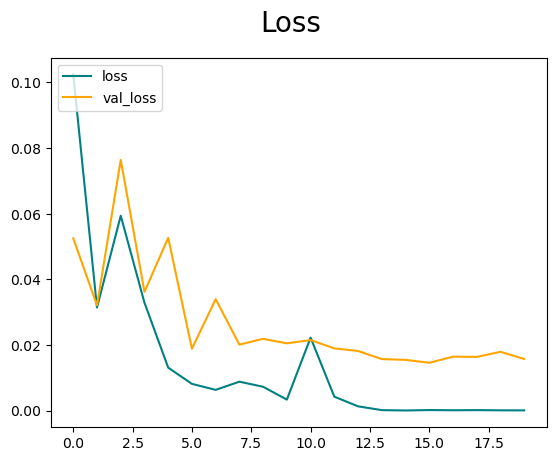

In [49]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

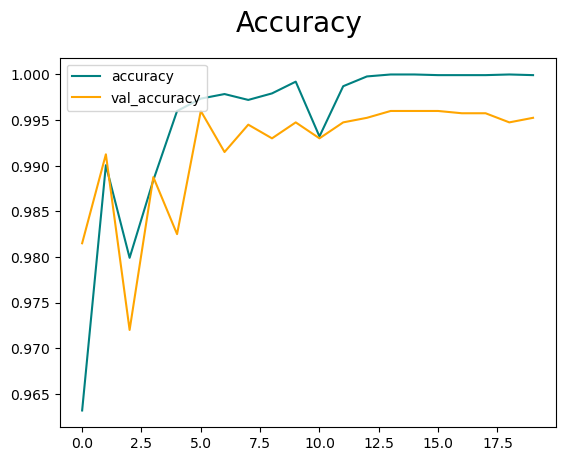

In [50]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [51]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [52]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [53]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

2024-11-19 10:16:56.916645: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [54]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.9929006, shape=(), dtype=float32) tf.Tensor(0.9979613, shape=(), dtype=float32) tf.Tensor(0.9954637, shape=(), dtype=float32)


# 10. Test

In [2]:
import cv2

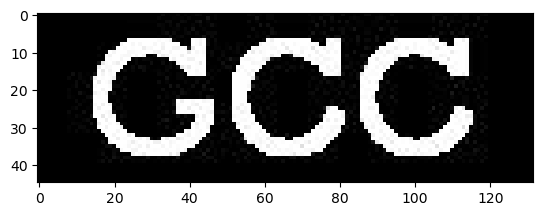

In [55]:
img = cv2.imread('g01142.jpg')
plt.imshow(img)
plt.show()

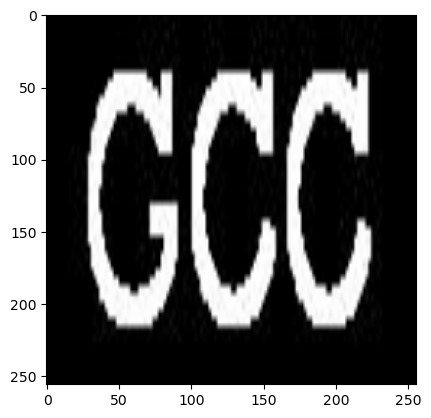

In [56]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [57]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


In [58]:
yhat

array([[0.9999994]], dtype=float32)

In [59]:
if yhat > 0.5: 
    print(f'Predicted class is good')
else:
    print(f'Predicted class is bad')

Predicted class is good


# 11. Save the Model

In [60]:
from tensorflow.keras.models import load_model

In [61]:
model.save(os.path.join('models','imageclassifier.keras'))

In [62]:
new_model = load_model('models/imageclassifier.keras')

In [63]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


array([[0.9999994]], dtype=float32)